In [6]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of patients
num_patients = 10000

# Generate data
data = {
    'Age': np.random.randint(20, 80, num_patients),
    'BMI': np.random.uniform(18, 40, num_patients),
    'GlucoseLevel': np.random.uniform(70, 200, num_patients),
    'Insulin': np.random.uniform(2, 300, num_patients),
    'BloodPressure': np.random.uniform(60, 180, num_patients),
    'Diabetes': np.random.choice([0, 1], num_patients, p=[0.7, 0.3])  # 70% no diabetes, 30% diabetes
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Introduce missing values randomly
for col in ['BMI', 'GlucoseLevel', 'Insulin', 'BloodPressure']:
    df.loc[np.random.choice(df.index, size=40, replace=False), col] = np.nan  # 40 NaN values per column

# Display first few rows
print(df.head())


   Age        BMI  GlucoseLevel     Insulin  BloodPressure  Diabetes
0   58  30.558787    104.889187  214.519887     125.326789         0
1   71  38.011099    131.054286  182.978094      83.452243         0
2   48  18.136044     79.958470  280.673718     136.229531         0
3   34  35.835039    161.767867  127.833260      65.172064         0
4   62  38.864130    121.176244  242.942439     179.216673         0


/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


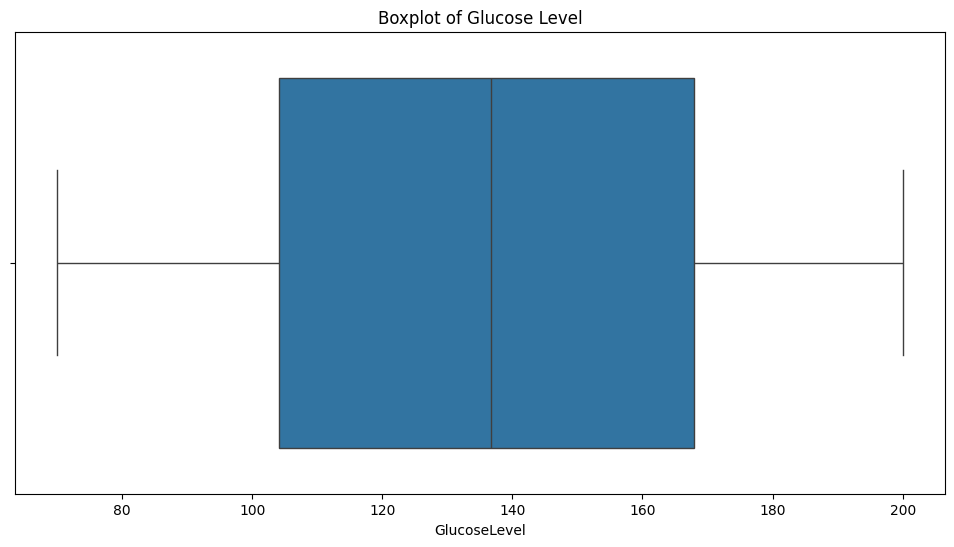

/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


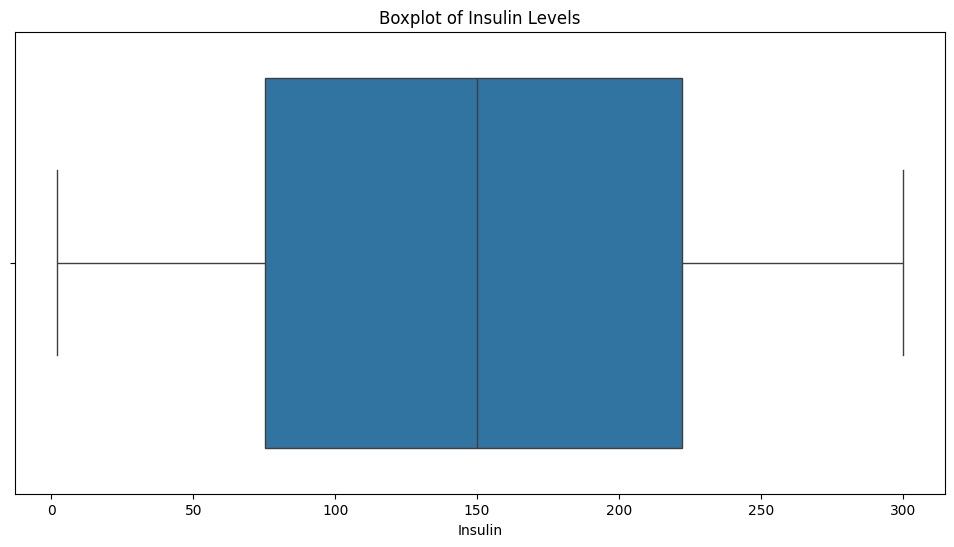

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Glucose Level
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['GlucoseLevel'])
plt.title("Boxplot of Glucose Level")
plt.show()

# Boxplot for Insulin
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Insulin'])
plt.title("Boxplot of Insulin Levels")
plt.show()


In [8]:
from sklearn.preprocessing import MinMaxScaler

# Fill NaN values with median
df.fillna(df.median(), inplace=True)

# Normalize features
scaler = MinMaxScaler()
df[['Age', 'BMI', 'GlucoseLevel', 'Insulin', 'BloodPressure']] = scaler.fit_transform(
    df[['Age', 'BMI', 'GlucoseLevel', 'Insulin', 'BloodPressure']]
)

print("\nData after normalization:\n", df.head())



Data after normalization:
         Age       BMI  GlucoseLevel   Insulin  BloodPressure  Diabetes
0  0.644068  0.570943      0.268363  0.713303       0.544397         0
1  0.864407  0.909768      0.469658  0.607435       0.195427         0
2  0.474576  0.006133      0.076565  0.935343       0.635258         0
3  0.237288  0.810832      0.705946  0.422345       0.043086         0
4  0.711864  0.948552      0.393664  0.808701       0.993500         0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting dataset into features (X) and target (y)
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

# Split data into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Model Evaluation
print("\n🔹 Logistic Regression Results 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

print("\n🔹 Random Forest Results 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



🔹 Logistic Regression Results 🔹
Accuracy: 0.7025
Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.83      1405
           1       0.00      0.00      0.00       595

    accuracy                           0.70      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.49      0.70      0.58      2000


🔹 Random Forest Results 🔹
Accuracy: 0.692
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.97      0.82      1405
           1       0.36      0.04      0.08       595

    accuracy                           0.69      2000
   macro avg       0.53      0.51      0.45      2000
weighted avg       0.60      0.69      0.60      2000



/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

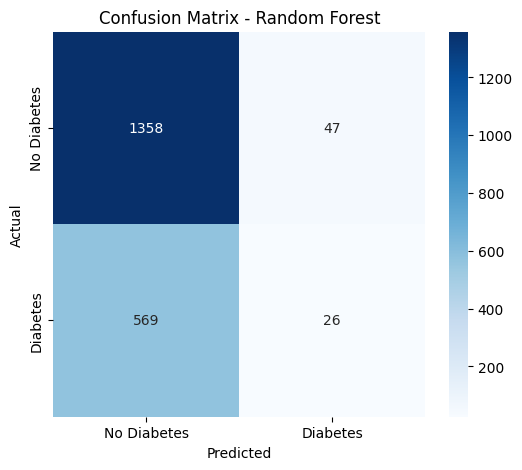

In [10]:
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()
